@channel **Hello Everyone,**

**2023-05-01 `21.2-Neural-Networks-Deep-Learning-Network Models in the Real World`**

So we have seen the Neural Network!  You can see by the activities, while there was a lot to understand the steps were few and straightforward, but we have only just begun.  Next class we will learn about deep neural networks.  This will provide us way more power for answering more complex questions.  We are going to go through some method of optimizing our models.  Lastly, we will go through the steps to properly prepare “real” data for our models.  Remember that our links from last class still apply here.

* [Long read on optimizing our Deep Learning Model](https://machinelearningmastery.com/improve-deep-learning-performance/)


**Objectives**

* Implement deep neural network models using TensorFlow.
* How different neural network structures change algorithm performance.
* Save trained TensorFlow models for later use.

**Presentation**
* [21.2 Neural Network Models in the Real World](https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-08-2023-U-LOLC/-/blob/main/Slides/Data-21.2-Neural_Network_Models_in_the_Real_World.pdf)

**Install**

```
pip install keras-tuner
```

**Best wishes.**

```bash
conda create -n DataClass python=3.9 -y
conda activate DataClass
jupyter lab
```

# ==========================================

### 2.01 Everyone Do: Over the Moon on Basic Neural Networks (10 min)

In [29]:
# !pip install keras-tuner

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

C:\Users\k\AppData\Local\Temp\ipykernel_29804\1761557998.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


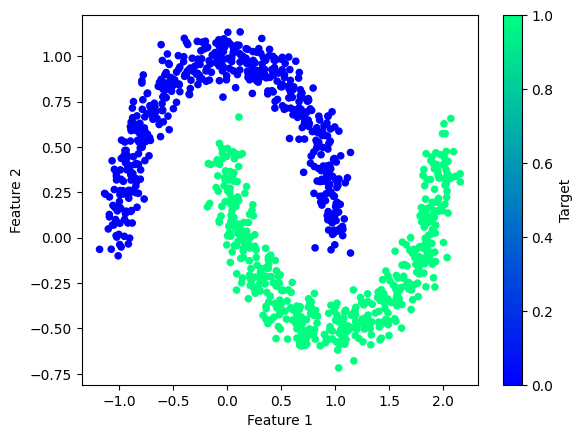

In [2]:
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")
plt.show()

In [10]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(input_dim=2, units=1, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [5]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


24/24 [==============================] - 1s 4ms/step - loss: 0.6278 - accuracy: 0.8467
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6194 - accuracy: 0.8853
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6108 - accuracy: 0.8880
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6020 - accuracy: 0.8907
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5930 - accuracy: 0.8933
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5839 - accuracy: 0.8933
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5744 - accuracy: 0.8933
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5650 - accuracy: 0.8933
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5555 - accuracy: 0.8920
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5460 - accuracy: 0.8920
Epoch 1

In [6]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2930 - accuracy: 0.8600 - 349ms/epoch - 44ms/step
Loss: 0.29304012656211853, Accuracy: 0.8600000143051147


In [7]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(input_dim=2, units=6, activation="relu"))

nn_model2.add(tf.keras.layers.Dense(units=3, activation="relu"))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=200)


Epoch 1/200
24/24 [==============================] - 2s 5ms/step - loss: 0.7948 - accuracy: 0.4360
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.7546 - accuracy: 0.4600
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.7224 - accuracy: 0.4827
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4827
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5040
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.5573
Epoch 7/200
24/24 [==============================] - 0s 5ms/step - loss: 0.6407 - accuracy: 0.6173
Epoch 8/200
24/24 [==============================] - 0s 5ms/step - loss: 0.6232 - accuracy: 0.6680
Epoch 9/200
24/24 [==============================] - 0s 6ms/step - loss: 0.6049 - accuracy: 0.6947
Epoch 10/200
24/24 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7680
Epoch 11/

In [9]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0302 - accuracy: 1.0000 - 66ms/epoch - 8ms/step
Loss: 0.030242610722780228, Accuracy: 1.0


# ==========================================

### 2. Instructor Do: Getting Deep with Deep Learning Models (10 min)

Basic neural network models are designed to evaluate input values *once* before they are used in an output classification or regression equation.

* Basic neural networks are limited to interpreting simple linear relationships and data with few **confounding factors**, or factors that have hidden effects on more than one variable.

To address and overcome the limitations of the basic neural network, we can implement a more robust neural network model by adding more hidden layers.

A neural network model with more than one hidden layer is known as a **deep neural network** or **deep learning model**.

![deep learning model diagram](https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/img/deep_learning_model.png)

Deep learning models function similarly to the basic neural network, with one major difference. The outputs of one hidden layer become the inputs to additional hidden layers of neurons.

This enables the next layer of neurons to evaluate higher-order interactions between weighted variables and to identify complex, nonlinear relationships.

Features of deep learning models:

* A deep learning model can identify and account for more information than any number of neurons in any single hidden layer.

* Deep learning models are named for their ability to learn from example data, regardless of the complexity or data type.

* Just like humans, deep learning models can identify patterns, determine severity, and adapt to changing input data from a wide variety of sources.

* Many data scientists believe that even the most complex interactions can be characterized by as few as three hidden layers (there is an ongoing debate among scientists about this).

* Deep learning models can train on images, natural language data, soundwaves, and even traditional tabular data, all with minimal preprocessing and direction.

The concept of deep learning models isn't new, but without access to powerful computers and libraries like TensorFlow, data scientists were limited in their ability to create and run these complex models.

Deep learning models typically require longer training iterations and memory resources than their basic neural network counterparts, but they achieve higher degrees of accuracy and precision.

* In other words, deep learning models may have more upfront costs, but they also have higher performance potential.

The easiest way to conceptualize the performance differences between basic neural networks and deep learning models is to return to the TensorFlow Playground.

[TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.14370&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) Note that this link will pre-populate the simulation with:

* The spiral dataset selected

* One layer with six neurons

![TF Playground Deep 1](https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/img/tf_playground_deep_1.png)

In this TensorFlow Playground simulation, we will use the spiral dataset, which is not linearly separable.

We'll start by training our single-layer, six-neuron, basic neural network over 1,000 epochs. Run the model through approximately 1,000 epochs in your web browser.

![TF Playground Deep 1](https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/img/tf_playground_deep_3.gif)

Neural network model struggles to correctly predict the test data points because it has only six neurons.

We will now add another hidden layer with six neurons:

* Clicking the plus (+) button next to "Hidden Layer" adds an extra layer.

* Clicking the plus (+) button directly above the second hidden layer adds more neurons (remember that we need six).

![TF Playground Deep 1 Point](https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/img/tf_playground_deep_points.png)

Run the new deep learning model through 1,000 epochs. Point out to students that the deep learning model is able to reduce the test loss at a much faster rate than the basic neural network model.

![TF Playground Deep 1](https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/img/tf_playground_deep_4.gif)

TensorFlow Playground shows us that the output of each neuron in the first layer is an input to each neuron in the second layer. This enables the model to identify interactions between different features in more complex dimensions.

The model achieves better performance with the same input data in fewer epochs because the model has more opportunities to identify features and interactions of interest within each epoch.

We might be tempted to add many more layers to boost a deep learning model's performance, but there are diminishing returns.

The drawbacks to building a deep learning model with too many layers:

* Deep learning models require more computational resources (memory and CPU power) for each layer. If we have limited resources or time, a larger deep learning model may not be possible.

* A deep learning model takes considerably more time to train than a basic neural network. Each hidden layer adds complexity and more computations.

* A model with multiple hidden layers will require more training data to produce an acceptable level of performance.

# ==========================================

### 2.02 Students Do: Back to the Moon (0:15)

# Back to the Moon
In this activity, you'll use a deep learning model to classify the moons dataset.
## Instructions
* Upload the starter notebook to Google Colab, and then run the cells to recreate the moons dummy dataset.
* Create your Keras Sequential model and add **more than one** Dense hidden layer to create a deep learning model.
  * **Notes:**
  * Only your first Dense layer uses the *input_dim* parameter.
  * All of your hidden layers should use the "ReLU" activation function.
* Compile your model and train the deep learning model on at least 100 epochs.
* Evaluate the performance of your model by calculating the loss and predictive accuracy of the model on your test dataset.
## Bonus
If you have enough time, try recreating your deep learning model with a different set of hidden layers and neurons, and then evaluate the performance of your new model. Are you able to achieve 100% predictive accuracy?

---

In [11]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [12]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(input_dim=2, units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 18        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 1s 2ms/step - loss: 0.9427 - accuracy: 0.2387
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.4613
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7510 - accuracy: 0.4813
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.4827
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.5680
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.7947
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8600
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8573
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8547
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8533
Epoch 11/

In [14]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0056 - accuracy: 1.0000 - 235ms/epoch - 29ms/step
Loss: 0.0056354086846113205, Accuracy: 1.0


# ==========================================

### 2.03 Instructor Do: Getting Hands On with Model Optimization (15 min)

[How To Improve Deep Learning Performance](https://machinelearningmastery.com/improve-deep-learning-performance/)

---
* Improve Performance With Data.

  - Get More Data.
  - Invent More Data.
  - Rescale Your Data.
  - Transform Your Data.
  - Feature Selection.
---
* Improve Performance With Algorithms.

  - Spot-Check Algorithms.
  - Steal From Literature.
  - Resampling Methods.
---
* Improve Performance With Algorithm Tuning.

  - Diagnostics.
  - Weight Initialization.
  - Learning Rate.
  - Activation Functions.
  - Network Topology.
  - Batches and Epochs.
  - Regularization.
  - Optimization and Loss.
  - Early Stopping.
---
* Improve Performance With Ensembles.

  - Combine Models.
  - Combine Views.
  - Stacking.
---

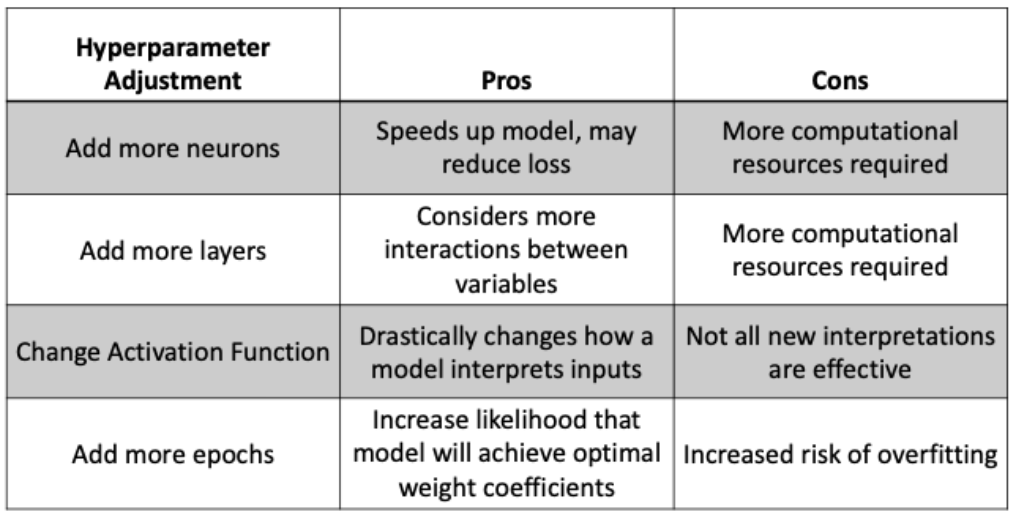

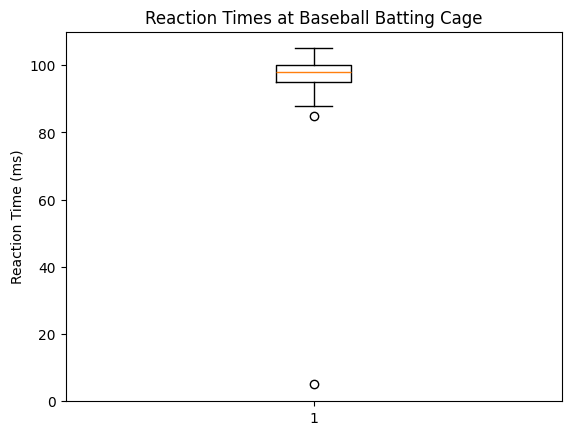

In [17]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

In [18]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(times,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [time for time in times if time < lower_bound or time > upper_bound]
potential_outliers

[85, 5]

# ==========================================

### 2.04 Instructor Do: Take the Guesswork Out of Model Optimization (15 min)

In [17]:
# !pip install keras-tuner
# !python -V

In [18]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    units_val =hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2)
    nn_model.add(tf.keras.layers.Dense(units=units_val, activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [26]:
# Import the kerastuner library
import keras_tuner as kt

In [41]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    directory="project_1",
    hyperband_iterations=2)

In [42]:
# Run the ke|rastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.8679999709129333

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 49s


In [39]:
for x in tuner.get_best_hyperparameters(3):
    print(x.values)

{'activation': 'relu', 'first_units': 7, 'num_layers': 4, 'units_0': 5, 'units_1': 7, 'units_2': 5, 'units_3': 9, 'units_4': 1, 'units_5': 3, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 3, 'num_layers': 4, 'units_0': 9, 'units_1': 7, 'units_2': 5, 'units_3': 3, 'units_4': 3, 'units_5': 7, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0053'}
{'activation': 'tanh', 'first_units': 3, 'num_layers': 4, 'units_0': 9, 'units_1': 7, 'units_2': 7, 'units_3': 3, 'units_4': 5, 'units_5': 5, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0042'}


In [29]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 7,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 7,
 'units_2': 5,
 'units_3': 9,
 'units_4': 1,
 'units_5': 3,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [40]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 0.3680 - accuracy: 0.9520 - 668ms/epoch - 84ms/step
Loss: 0.36796510219573975, Accuracy: 0.9520000219345093


# ==========================================

### 2.05 Students Do: Giving Your Model Building a Tune-Up (15 min)

# Tune Up
In this activity, you'll use KerasTuner to optimize the hyperparameters of your deep learning model.
## Instructions:
* Run the starter code provided in Google Colab to create the circles dummy dataset.
* Convert the circles dataset to a dataframe and plot the circles dataset using Pandas.
* Create a method that creates and compiles a new Sequential deep learning model with hyperparameter options. Be sure to include the following features:
  * Allow KerasTuner to select between **ReLU** and **tanh** activation functions for each hidden layer.
  * Allow KerasTuner to decide from 1 to 30 neurons in the first dense layer.
    * **Note:** To limit the tuner runtime, increase your *step* argument to at least 5.
  * Allow KerasTuner to decide from 1 to 5 hidden layers and 1 to 30 neurons in each Dense layer.
* Import the KerasTuner library and create a **Hyperband** tuner instance. Use the following parameters in your tuner:
  * The *objective* is "val_accuracy"
  * *max_epochs* equal to 20
  * *hyperband_iterations* equal to two.
* Run the KerasTuner search for best hyperparameters over 20 epochs.
* Retrieve the top three model hyperparameters from the tuner search and print the values.
* Retrieve the top three models from the tuner search and compare their predictive accuracy against the test dataset.

---

In [43]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_circles

# Creating dummy nonlinear data
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, random_state=78)

# Transforming y_circles to a vertical vector
y_circles = y_circles.reshape(-1, 1)

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

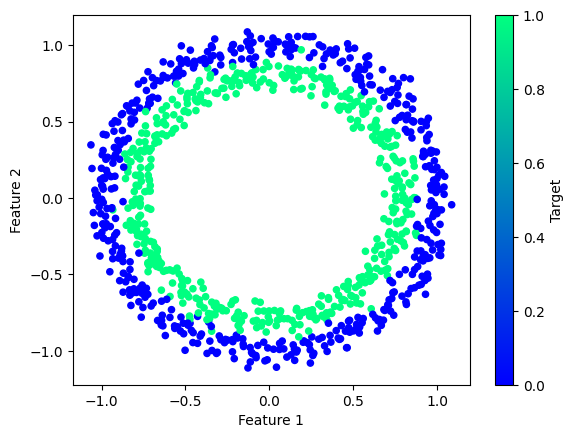

In [44]:
# Creating a DataFrame to plot the nonlinear dummy data
df_circles = pd.DataFrame(X_circles, columns=["Feature 1", "Feature 2"])
df_circles["Target"] = y_circles

# Plot the nonlinear dummy data
df_circles.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")
plt.show()

In [46]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [48]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    directory="project_2",
    hyperband_iterations=2)

In [49]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 12s]
val_accuracy: 0.7960000038146973

Best val_accuracy So Far: 0.9559999704360962
Total elapsed time: 00h 06m 04s


In [52]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 16, 'num_layers': 4, 'units_0': 1, 'units_1': 11, 'units_2': 16, 'units_3': 16, 'units_4': 11, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 26, 'num_layers': 5, 'units_0': 11, 'units_1': 21, 'units_2': 16, 'units_3': 16, 'units_4': 16, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 16, 'num_layers': 5, 'units_0': 21, 'units_1': 16, 'units_2': 11, 'units_3': 1, 'units_4': 11, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [53]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 0.3207 - accuracy: 0.9560 - 732ms/epoch - 92ms/step
Loss: 0.32065173983573914, Accuracy: 0.9559999704360962
8/8 - 1s - loss: 0.5909 - accuracy: 0.8400 - 818ms/epoch - 102ms/step
Loss: 0.5908608436584473, Accuracy: 0.8399999737739563
8/8 - 1s - loss: 0.5595 - accuracy: 0.7960 - 863ms/epoch - 108ms/step
Loss: 0.5594733953475952, Accuracy: 0.7960000038146973


In [54]:
# Get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'tanh',
 'first_units': 26,
 'num_layers': 5,
 'units_0': 11,
 'units_1': 21,
 'units_2': 16,
 'units_3': 16,
 'units_4': 16,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [51]:
# Compare the performance to the second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 0.5909 - accuracy: 0.8400 - 688ms/epoch - 86ms/step
Loss: 0.5908608436584473, Accuracy: 0.8399999737739563


# ==========================================

### BREAK (0:10)

# ==========================================

### 2.06 Instructor Do: Getting Real with Neural Network Datasets (20 min)

![neural network preprocessing logic flowchart image](https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/img/NN_Preprocess_Flowchart.png)

In [55]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/HR-Employee-Attrition.csv')
attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,WorkLifeBalance
0,41,Yes,Travel_Rarely,1102,Sales,1,2,2,Female,94,...,Single,5993,19479,8,Y,Yes,11,3,80,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,3,Male,61,...,Married,5130,24907,1,Y,No,23,4,80,3
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,4,Male,92,...,Single,2090,2396,6,Y,Yes,15,3,80,3
3,33,No,Travel_Frequently,1392,Research & Development,3,4,4,Female,56,...,Married,2909,23159,1,Y,Yes,11,3,80,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,1,Male,40,...,Married,3468,16632,9,Y,No,12,3,80,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,3,Male,41,...,Married,2571,12290,4,Y,No,17,3,80,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,4,Male,42,...,Married,9991,21457,4,Y,No,15,3,80,3
1467,27,No,Travel_Rarely,155,Research & Development,4,3,2,Male,87,...,Married,6142,5174,1,Y,Yes,20,4,80,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,4,Male,63,...,Married,5390,13243,2,Y,No,14,3,80,2


In [3]:
# Generate our categorical variable lists
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [4]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
Education         2
JobRole           3
Gender            2
MaritalStatus     3
Over18            2
OverTime          2
dtype: int64

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_R,Department_S,Department_T,Education_a,Education_e,...,JobRole_s,Gender_F,Gender_M,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_N,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_s,Gender_F,Gender_M,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_N,Over18_Y,OverTime_No,OverTime_Yes
0,0,35,502,5,4,48,4,2,5,9200,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,42,497,3,3,50,4,3,5,10719,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,34,505,4,3,46,2,3,5,9843,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,43,493,5,2,48,3,1,5,12077,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,43,536,4,4,53,2,3,2,10486,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [7]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 296       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 1087 samples
Epoch 1/100
1087/1087 [==============================] - 1s 555us/sample - loss: 0.4951 - accuracy: 0.8427
Epoch 2/100
1087/1087 [==============================] - 0s 68us/sample - loss: 0.4662 - accuracy: 0.8427
Epoch 3/100
1087/1087 [==============================] - 0s 66us/sample - loss: 0.4506 - accuracy: 0.8427
Epoch 4/100
1087/1087 [==============================] - 0s 93us/sample - loss: 0.4422 - accuracy: 0.8427
Epoch 5/100
1087/1087 [==============================] - 0s 90us/sample - loss: 0.4364 - accuracy: 0.8427
Epoch 6/100
1087/1087 [==============================] - 0s 72us/sample - loss: 0.4323 - accuracy: 0.8427
Epoch 7/100
1087/1087 [==============================] - 0s 67us/sample - loss: 0.4287 - accuracy: 0.8427
Epoch 8/100
1087/1087 [==============================] - 0s 70us/sample - loss: 0.4256 - accuracy: 0.8427
Epoch 9/100
1087/1087 [==============================] - 0s 69us/sample - loss: 0.4226 - accuracy: 0.8427
Epoch 10/100
1087/1087 

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

363/363 - 0s - loss: 0.4816 - accuracy: 0.8375
Loss: 0.4815787776442599, Accuracy: 0.8374655842781067


# ==========================================

### 2.07 Students Do: Detecting Myopia through Deep Learning (0:20)

# Detecting Myopia
In this activity, you'll use a deep learning model to predict if a person has myopia.
**Instructions:**
* Upload the starter notebook to Google Colab and run the code to import the dependencies and load the myopia dataset.
* Separate the myopia **MYOPIC** target from the other features in the dataset.
* Split the features and target into training and test datasets.
* Preprocess the input data accordingly:
  * If preprocessing categorical data, use Scikit-learn's **OneHotEncoder** module.
  * If preprocessing numerical data, use Scikit-learn's **StandardScaler** module.
* Define a deep learning model with the following features:
  * A first Dense layer with eight inputs and the "ReLU" activation function
  * A second Dense layer with at least eight neurons and the "ReLU" activation function
  * An output layer with one neuron and the "sigmoid" activation function
* Compile and train the model across no more than 100 epochs.
* Evaluate the performance of the deep learning model by calculating the test loss and predictive accuracy.
## Reference
Reduced dataset from [Orinda Longitudinal Study of Myopia conducted by the US National Eye Institute.](https://clinicaltrials.gov/ct2/show/NCT00000169)

---

In [56]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [57]:
# Import our input dataset
myopia_df = pd.read_csv('https://static.bc-edx.com/data/dl-1-2/m21/lessons/2/myopia.csv')
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [58]:
# Remove MYOPIC target from features data
y = myopia_df.MYOPIC.values
X = myopia_df.drop(columns="MYOPIC").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [59]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=14, activation="tanh", input_dim=14))
nn_model.add(tf.keras.layers.Dense(units=16, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=16, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
15/15 [==============================] - 1s 3ms/step - loss: 0.7052 - accuracy: 0.4428
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.7019
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.8078
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.8596
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.8683
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8769
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8834
Epoch 8/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8855
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.8898
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.9006
Epoch 11/50
15/15 [

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "21.2-Neural-Networks-Deep-Learning-Neural Network Models in the Real World"
objectives = [
    "Implement deep neural network models using TensorFlow",
    "How different neural network structures change algorithm performance",
    "Save trained TensorFlow models for later use",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))